In [6]:
%pwd

'/Users/anasarshad/Desktop/ML-1-Project'

In [14]:
import pandas as pd

In [15]:
teams = pd.read_csv("/Users/anasarshad/Downloads/teams.csv")

In [16]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [20]:
teams = teams[["year","athletes","age","prev_medals","medals"]]

In [21]:
teams

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [22]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [23]:
import seaborn as sns

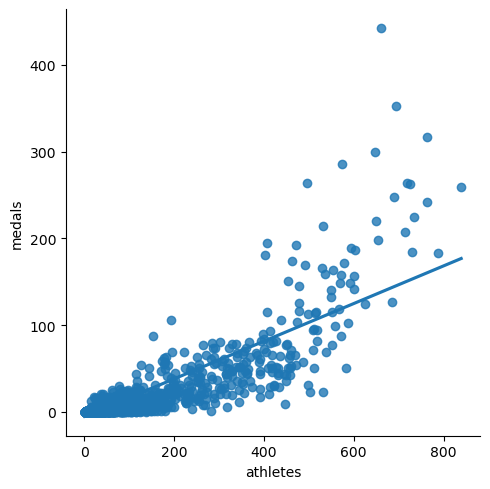

In [31]:
sns.lmplot(x="athletes",y="medals",data=teams,ci=None,fit_reg=True)

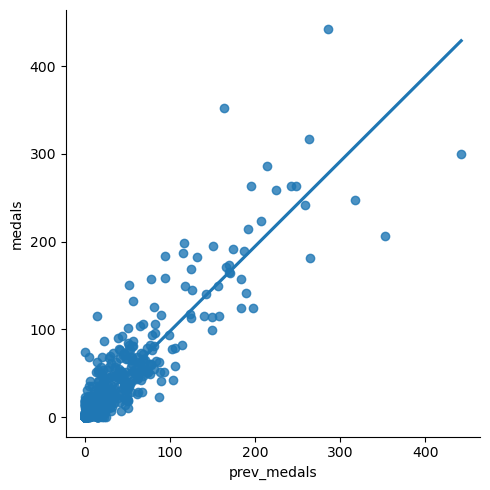

In [32]:
sns.lmplot(x="prev_medals",y="medals",data=teams,ci=None,fit_reg=True)

<Axes: ylabel='Frequency'>

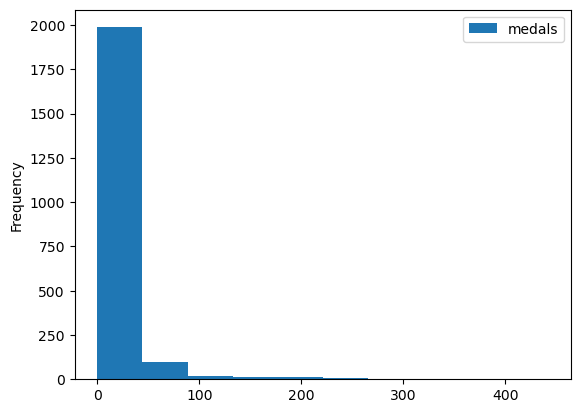

In [35]:
 teams.plot.hist(y="medals")

step 4: clean the data

In [39]:
teams[teams.isnull().any(axis=1)]

,year,athletes,age,prev_medals,medals
19,1992,9,25.3,NaN,0
26,1964,7,26.0,NaN,0
39,1976,3,28.3,NaN,0
50,1980,17,17.4,NaN,0
59,1976,17,23.2,NaN,0
...,...,...,...,...,...
2092,1988,6,20.5,NaN,0
2103,1984,3,27.7,NaN,0
2105,1992,8,19.6,NaN,0
2112,1988,5,23.6,NaN,0


In [40]:
# need to remove null values 
teams.dropna()

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [45]:
# split the data
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [46]:
train.shape

(1736, 5)

In [47]:
test.shape

(408, 5)

In [49]:
 # Train a model
from sklearn.linear_model import LinearRegression

# initiate
reg = LinearRegression()


In [51]:
predictors = ["athletes","prev_medals"]
target = ["medals"]

In [70]:
# built
reg.fit(train[predictors],train[target])

LinearRegression()

In [ ]:
# Phasing issue here still null data was there in prev_medal so take sthese steps to clean null value

In [69]:
print(train.isnull().sum())

year           0
athletes       0
age            0
prev_medals    0
medals         0
dtype: int64


In [66]:
train = train.dropna(subset=['prev_medals'])


In [67]:
print(train.isnull().sum())

year           0
athletes       0
age            0
prev_medals    0
medals         0
dtype: int64


In [75]:
# predict
predictions = reg.predict(test[predictors])

In [76]:
predictions

array([[-9.61221245e-01],
       [-1.17633261e+00],
       [-1.42503158e+00],
       [-1.71184673e+00],
       [ 2.15562926e+00],
       [ 3.91463636e+00],
       [-1.71184673e+00],
       [-1.85525431e+00],
       [ 3.67563128e-01],
       [-2.77770967e-01],
       [-1.85525431e+00],
       [-1.49673537e+00],
       [ 4.67519911e+01],
       [ 2.87550937e+01],
       [ 4.58450091e+00],
       [ 2.54773581e+00],
       [-1.85525431e+00],
       [-1.64014295e+00],
       [-1.85525431e+00],
       [-1.85525431e+00],
       [ 1.46556876e+02],
       [ 1.20571799e+02],
       [ 6.56314795e+00],
       [ 3.95275254e+00],
       [ 7.34283247e+00],
       [ 1.03117468e+01],
       [ 5.19171882e+00],
       [ 3.58517645e+00],
       [-1.64014295e+00],
       [-1.64014295e+00],
       [-1.56843916e+00],
       [-1.20992022e+00],
       [-1.71184673e+00],
       [-1.42503158e+00],
       [ 1.17929959e+01],
       [ 1.00049298e+01],
       [-1.78355052e+00],
       [-1.71184673e+00],
       [-1.5

In [77]:
test["predictions"] = predictions

/var/folders/dn/12z_75rn61l7rblw0jkxkczm0000gn/T/ipykernel_11327/3079885056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictions


In [78]:
test

,year,athletes,age,prev_medals,medals,predictions
6,2012,6,24.8,1.0,1,-0.961221
7,2016,3,24.7,1.0,0,-1.176333
24,2012,10,25.7,0.0,0,-1.425032
25,2016,6,23.7,0.0,0,-1.711847
37,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...
2111,2016,3,19.3,0.0,0,-1.926958
2131,2012,7,22.6,0.0,0,-1.640143
2132,2016,7,24.1,0.0,0,-1.640143
2142,2012,9,27.3,4.0,0,1.505767


In [79]:
# to remove negative
test.loc[test["predictions"]<0,"predictions"] = 0


In [80]:
# to make it round
test["predictions"] = test["predictions"].round()

In [81]:
test

,year,athletes,age,prev_medals,medals,predictions
6,2012,6,24.8,1.0,1,0.0
7,2016,3,24.7,1.0,0,0.0
24,2012,10,25.7,0.0,0,0.0
25,2016,6,23.7,0.0,0,0.0
37,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...
2111,2016,3,19.3,0.0,0,0.0
2131,2012,7,22.6,0.0,0,0.0
2132,2016,7,24.1,0.0,0,0.0
2142,2012,9,27.3,4.0,0,2.0


In [83]:
# checking the error (MAE)
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"],test["predictions"])

In [84]:
error

3.2987654320987656

In [86]:
# checkking difference between error and std
teams.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [91]:
# compare predictions on age bases
test[test["age"] == 26.0]


,year,athletes,age,prev_medals,medals,predictions
49,2016,4,26.0,0.0,0,0.0
148,2012,29,26.0,7.0,4,5.0
349,2016,405,26.0,55.0,69,68.0
747,2012,2,26.0,0.0,0,0.0
907,2012,95,26.0,3.0,6,7.0
1054,2012,132,26.0,13.0,13,17.0
1485,2016,232,26.0,27.0,36,35.0
1820,2016,152,26.0,4.0,11,12.0
1914,2016,58,26.0,3.0,6,4.0
1930,2016,3,26.0,0.0,0,0.0


In [93]:
# compare predictions on year bases
test[test["year"] == 2016]

,year,athletes,age,prev_medals,medals,predictions
7,2016,3,24.7,1.0,0,0.0
25,2016,6,23.7,0.0,0,0.0
38,2016,74,24.0,1.0,2,4.0
49,2016,4,26.0,0.0,0,0.0
58,2016,26,27.5,0.0,0,0.0
...,...,...,...,...,...,...
2091,2016,28,26.9,0.0,2,0.0
2099,2016,4,20.8,0.0,0,0.0
2111,2016,3,19.3,0.0,0,0.0
2132,2016,7,24.1,0.0,0,0.0
